<a href="https://colab.research.google.com/github/psgrigoletti/curso-pmf/blob/main/modulo-3/PMF_Macroeconomia_e_Finan%C3%A7as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

#Macroeconomia e Finanças

##Chave de API

In [1]:
chave = '5Dvc13kQ_qEj-QnxsJdA'

##Instalar e Importar Bibliotecas

In [2]:
!pip install nasdaq-data-link
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0

In [73]:
# Importando bibliotecas
import nasdaqdatalink 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np 

In [74]:
nasdaqdatalink.ApiConfig.api_key = chave

##Indicadores Macroeconômicos

###Base

In [75]:
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR')

In [76]:
juros_reais_EUA

,Value
Date,
2000-07-03,7.03
2000-07-05,6.52
2000-07-06,6.51
2000-07-07,6.42
2000-07-10,6.51
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [77]:
type(juros_reais_EUA)

pandas.core.frame.DataFrame

In [82]:
# Limitar a data
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR', start_date='2022-01-01', end_date='2023-02-28')
juros_reais_EUA

,Value
Date,
2022-01-03,0.08
2022-01-04,0.08
2022-01-05,0.08
2022-01-06,0.08
2022-01-07,0.08
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


In [83]:
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR', collapse='monthly')
juros_reais_EUA

,Value
Date,
2000-07-31,6.64
2000-08-31,6.65
2000-09-30,6.60
2000-10-31,6.59
2000-11-30,6.62
...,...
2022-03-31,0.33
2022-04-30,0.33
2022-05-31,0.83


## Taxa Selic

In [84]:
selic = nasdaqdatalink.get('BCB/432', start_date='2000-01-01', end_date='2023-02-28')
selic

,Value
Date,
2000-01-01,19.00
2000-01-02,19.00
2000-01-03,19.00
2000-01-04,19.00
2000-01-05,19.00
...,...
2023-02-24,13.75
2023-02-25,13.75
2023-02-26,13.75


In [85]:
# Criar um gráfico da Selic
fig = go.Figure()
fig.add_trace(go.Scatter(name='SELIC', x=selic.index,y=selic.Value))
fig.show()

##Índices inflacionários

In [86]:
# IPCA Acumulado
ipca = nasdaqdatalink.get('BCB/13522',start_date='2000-01-01')
ipca

,Value
Date,
2000-01-31,8.85
2000-02-29,7.86
2000-03-31,6.92
2000-04-30,6.77
2000-05-31,6.47
...,...
2022-09-30,7.17
2022-10-31,6.47
2022-11-30,5.90


In [87]:
# Criar o gráfico do IPCA
fig = go.Figure()
fig.add_trace(go.Scatter(name='IPCA', x=ipca.index, y=ipca.Value ))
fig.update_layout(title_text='<b>IPCA Acumulado 12M', template='simple_white')
fig.show()

In [88]:
# Preços administrados
# BCB/4448 - Bens não comercalizaveis
# BCB/4447 - Bens comercalizaveis
ipca_adm = nasdaqdatalink.get('BCB/4449', start_date = '2000-01-01')
fig = go.Figure()
fig.add_trace(go.Bar(name='IPCA_ADM', x=ipca_adm.index, y=ipca_adm.Value))
fig.show()

In [89]:
# IGPM
igpm = nasdaqdatalink.get('BCB/189', start_date='2000-01-01')
igpm

,Value
Date,
2000-01-31,1.24
2000-02-29,0.35
2000-03-31,0.15
2000-04-30,0.23
2000-05-31,0.31
...,...
2022-09-30,-0.95
2022-10-31,-0.97
2022-11-30,-0.56


In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='IGPM', x=igpm.index, y=igpm.Value))
fig.show()

In [93]:
# INCC
incc = nasdaqdatalink.get('BCB/192', start_date='2002-01-01')

fig=go.Figure()
fig.add_trace(go.Bar(name='INCC', x=incc.index, y=incc.Value))
fig.update_layout(title_text='INCC Variação Mensal', template='simple_white')
fig.show()

##PIB

In [95]:
# PIB em dólar ODA/BRA_NGDPD

pib = nasdaqdatalink.get('BCB/4380', start_date='2000-01-01')

fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB', x=pib.index, y=pib.Value))
fig.show()

In [96]:
# PIB em dólar

pib_usd = nasdaqdatalink.get('ODA/BRA_NGDPD', start_date='2000-01-01')

fig = go.Figure()
fig.add_trace(go.Scatter(name='PIB_USD', x=pib_usd.index, y=pib_usd.Value))
fig.show()

##Índices de Confiança

###Sondagem de Serviços

In [97]:
confianca_servicos = nasdaqdatalink.get('BCB/20339', start_date='2002-01-01')

fig = go.Figure()
fig.add_trace(go.Scatter(name='ConfiancaServicos', x=confianca_servicos.index, y=confianca_servicos.Value))
fig.show()

###Confiança do Consumidor

In [98]:
confianca_consumidor = nasdaqdatalink.get('BCB/4393')

fig = go.Figure()
fig.add_trace(go.Scatter(name='Confianca_Consumidor', x=confianca_consumidor.index, y=confianca_consumidor.Value))
fig.show()

##Dólar

In [99]:
# Yahoo Finance BRL=X
# Nasdaq Datalink Banco Central BCB/10813

dolar = nasdaqdatalink.get('BCB/10813', start_date='2000-01-01')

fig = go.Figure()
fig.add_trace(go.Scatter(name='DÓLAR', x=dolar.index, y=dolar.Value))
fig.update_layout(title_text='Dólar/Real', template='simple_white')
fig.show()

##Correlações

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns

###Indicadores Macroeconômicos

In [101]:
# Criar dataframes vazios
selic2 = pd.DataFrame()
confianca_consumidor2 = pd.DataFrame()
pib2 = pd.DataFrame()
incc2 = pd.DataFrame()
ipca2 = pd.DataFrame()
dolar2 = pd.DataFrame()

In [103]:
# Obter os dados
selic2['SELIC'] = nasdaqdatalink.get('BCB/432', start_date='2015-01-01', end_date='2023-02-28', collapse='monthly')
confianca_consumidor2['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', start_date='2015-01-01', end_date="2023-02-28",collapse="monthly")
pib2['PIB'] = nasdaqdatalink.get("BCB/4380", start_date="2015-01-01",end_date="2023-02-28",collapse="monthly")
ipca2['IPCA'] = nasdaqdatalink.get("BCB/13522", start_date = '2015-01-01',end_date="2023-02-28",collapse="monthly")
incc2['INCC'] = nasdaqdatalink.get('BCB/192', start_date='2015-01-01',end_date="2023-02-28",collapse="monthly")
dolar2['DOLAR'] = nasdaqdatalink.get('BCB/10813', start_date='2015-01-01', end_date='2023-02-28', collapse='monthly')

In [104]:
macros = pd.concat([selic2, confianca_consumidor2, pib2, ipca2, incc2, dolar2], axis=1)
macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
Date,,,,,,
2015-01-31,12.25,112.69,474271.6,7.14,0.92,2.6617
2015-02-28,12.25,112.89,466778.9,7.70,0.31,2.8777
2015-03-31,12.75,106.86,515603.3,8.13,0.62,3.2074
2015-04-30,13.25,101.56,497146.3,8.17,0.46,2.9930
2015-05-31,13.25,91.77,492272.1,8.47,0.95,3.1781
...,...,...,...,...,...,...
2022-08-31,13.75,106.76,855971.3,8.73,0.09,5.1784
2022-09-30,13.75,111.46,829534.3,7.17,0.09,5.4060
2022-10-31,13.75,114.23,832985.7,6.47,0.12,5.2564


In [105]:
# Criar uma matriz de correlação 

corr_macros = macros.corr()
corr_macros

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
SELIC,1.000000,-0.497816,-0.233810,0.619247,-0.142728,-0.469835
CONFIANCA,-0.497816,1.000000,0.339318,-0.452705,-0.157292,0.194353
PIB,-0.233810,0.339318,1.000000,0.222280,0.278092,0.800247
IPCA,0.619247,-0.452705,0.222280,1.000000,0.289942,0.141250
INCC,-0.142728,-0.157292,0.278092,0.289942,1.000000,0.315761
DOLAR,-0.469835,0.194353,0.800247,0.141250,0.315761,1.000000


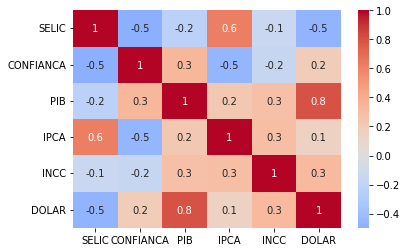

In [106]:
# Construir um heatmap
lista_macros = macros.columns

sns.heatmap(corr_macros, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [107]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='SELIC', x=macros.index, y=macros['SELIC']),row=1, col=1)
fig.add_trace(go.Scatter(name='IPCA', x=macros.index, y=macros['IPCA']),row=1, col=1, secondary_y=False)
fig.update_layout(title_text='SELIC VS IPCA', template='simple_white')
fig.show()

In [108]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='PIB', x=macros.index, y=macros['PIB']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=macros.index, y=macros['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='PIB VS DOLAR', template='simple_white')
fig.show()

##Combinando ativos com macro


In [110]:
selic3 = pd.DataFrame()
confianca_consumidor3 = pd.DataFrame()
pib3 = pd.DataFrame()
incc3 = pd.DataFrame()
ipca3 = pd.DataFrame()
dolar3 = pd.DataFrame()

selic3['SELIC'] = nasdaqdatalink.get('BCB/432', start_date='2014-12-31', end_date='2023-02-28', collapse='daily')
confianca_consumidor3['CONFIANCA'] = nasdaqdatalink.get('BCB/4393', start_date='2014-12-31', end_date="2023-02-28",collapse="daily")
pib3['PIB'] = nasdaqdatalink.get("BCB/4380", start_date="2014-12-31",end_date="2023-02-28",collapse="dailyy")
ipca3['IPCA'] = nasdaqdatalink.get("BCB/13522", start_date = '2014-12-31',end_date="2023-02-28",collapse="daily")
incc3['INCC'] = nasdaqdatalink.get('BCB/192', start_date='2014-12-31',end_date="2023-02-28",collapse="monthly")
dolar3['DOLAR'] = nasdaqdatalink.get('BCB/10813', start_date='2014-12-31', end_date='2023-02-28', collapse='daily')

In [111]:
macros2 = pd.concat([selic3, confianca_consumidor3, pib3, ipca3, incc3, dolar3], axis=1)
macros2

,SELIC,CONFIANCA,PIB,IPCA,INCC,DOLAR
Date,,,,,,
2014-12-31,11.75,112.95,501109.7,6.41,0.08,2.6556
2015-01-01,11.75,NaN,NaN,NaN,NaN,NaN
2015-01-02,11.75,NaN,NaN,NaN,NaN,2.6923
2015-01-03,11.75,NaN,NaN,NaN,NaN,NaN
2015-01-04,11.75,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-02-24,13.75,NaN,NaN,NaN,NaN,5.1785
2023-02-25,13.75,NaN,NaN,NaN,NaN,NaN
2023-02-26,13.75,NaN,NaN,NaN,NaN,NaN


In [112]:
# Preencher NaN com último dado disponível "forward fill"
macros2.fillna(method='ffill',inplace=True)

##Fundos Imobiliários

In [113]:
# Fundo Imobiliario
# BRCR11 - Lajes corporativas
# HGLG11 - Imóveis industriais logísticos
# KNCR11 - Fundo de papel

lista_fiis = ['HGLG11.SA', 'KNCR11.SA','BRCR11.SA']

fiis = yf.download(lista_fiis, start='2015-01-01', end='2023-02-28')['Adj Close']
fiis

[*********************100%***********************]  3 of 3 completed


,BRCR11.SA,HGLG11.SA,KNCR11.SA
Date,,,
2015-01-02,97.069847,98.054398,90.933647
2015-01-05,97.466949,99.762039,90.478981
2015-01-06,96.716866,98.863266,91.807999
2015-01-07,97.493423,97.964523,90.583893
2015-01-08,96.893356,97.515137,91.807999
...,...,...,...
2023-02-17,54.430000,161.649994,99.000000
2023-02-22,54.900002,160.160004,99.029999
2023-02-23,54.090000,160.419998,99.099998


In [116]:
# Juntando os dataframes através das datas
comparativo_fiis = pd.merge(fiis,macros2, how='inner', left_index=True, right_index=True)

In [117]:
# Criando a tabela de correlação
tabela_fiis = comparativo_fiis.corr()

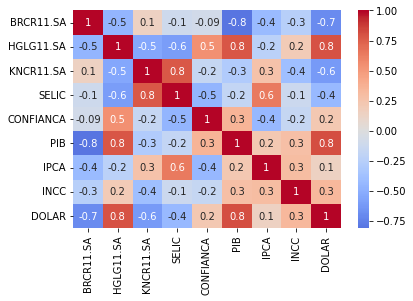

In [118]:
# Colocando no heatmap
lista_macros = tabela_fiis.columns
sns.heatmap(tabela_fiis, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_macros,
            yticklabels=lista_macros);

In [119]:
# Gráfico comparativo
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='BRCR11', x=comparativo_fiis.index, y=comparativo_fiis['BRCR11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='BRCR11 VS DOLAR', template='simple_white')
fig.show()

In [120]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='HGLG11.SA', x=comparativo_fiis.index, y=comparativo_fiis['HGLG11.SA']),row=1, col=1)
fig.add_trace(go.Scatter(name='DOLAR', x=comparativo_fiis.index, y=comparativo_fiis['DOLAR']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='HGLG11.SA VS DOLAR', template='simple_white')
fig.show()

##Ações

In [121]:
def heatmap(df):
  comparativo_df = pd.merge(df,macros2, how='inner', left_index=True, right_index=True)
  tabela_df = comparativo_df.corr()
  lista_df = tabela_df.columns

  sns.heatmap(tabela_df, cmap='coolwarm',
              center=0,
              annot=True,
              fmt='.1g',
              xticklabels=lista_df,
              yticklabels=lista_df);

[*********************100%***********************]  1 of 1 completed


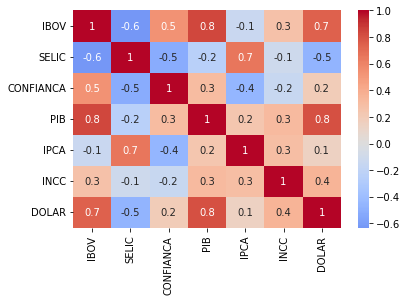

In [64]:
#Indice
ibov = pd.DataFrame()
ibov['IBOV'] = yf.download('^BVSP', start='2015-01-01', end='2023-02-28')['Adj Close']

comparativo_ibov = pd.merge(ibov,macros2, how='inner', left_index=True, right_index=True)
tabela_ibov=comparativo_ibov.corr()
lista_ibov = tabela_ibov.columns

sns.heatmap(tabela_ibov, cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.1g',
            xticklabels=lista_ibov,
            yticklabels=lista_ibov);


In [63]:
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='IBOV', x=comparativo_ibov.index, y=comparativo_ibov['IBOV']),row=1, col=1)
fig.add_trace(go.Scatter(name='SELIC', x=comparativo_ibov.index, y=comparativo_ibov['SELIC']),row=1, col=1, secondary_y=True)
fig.update_layout(title_text='IBOV VS SELIC', template='simple_white')
fig.show()

###Varejo Eletrônico
'MGLU3.SA','VIIA3.SA','AMER3.SA'

[*********************100%***********************]  3 of 3 completed


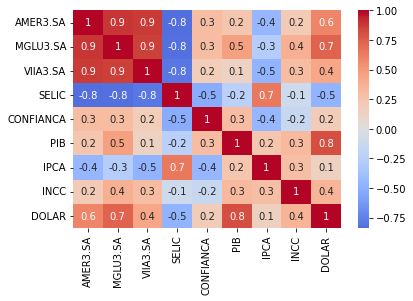

In [62]:
# Varejo eletronicos
lista_varejo = ['MGLU3.SA','VIIA3.SA','AMER3.SA']
varejo_eletronico = yf.download(lista_varejo, start='2015-01-01', end='2022-12-31')['Adj Close']
heatmap(varejo_eletronico)

###Moda/Vestuário
'GUAR3.SA','LREN3.SA','AMAR3.SA','ARZZ3.SA'

[*********************100%***********************]  4 of 4 completed


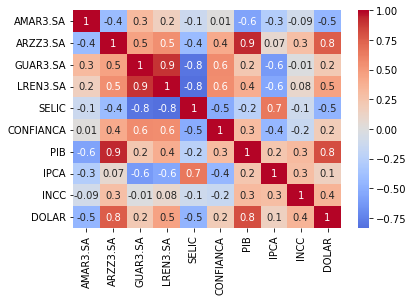

In [61]:
# Moda/Vestuario
lista_moda_vestuario = ['GUAR3.SA','LREN3.SA','AMAR3.SA','ARZZ3.SA']
moda_vestuario = yf.download(lista_moda_vestuario, start='2015-01-01', end='2023-02-28')['Adj Close']
heatmap(moda_vestuario)

###Supermercado Atacarejo
'ASAI3.SA', 'CRFB3.SA', 'GMAT3.SA', 'PCAR3.SA'

[*********************100%***********************]  4 of 4 completed


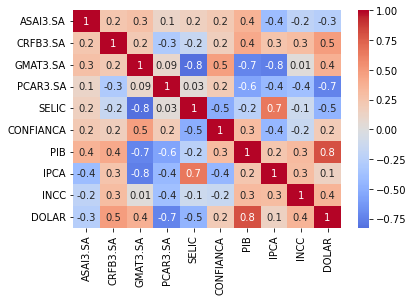

In [59]:
# Supermercados Atacarejo
lista_supermercados = ['ASAI3.SA', 'CRFB3.SA', 'GMAT3.SA', 'PCAR3.SA']
varejo_superm = yf.download(lista_supermercados, start='2015-01-01', end='2023-02-28')['Adj Close']
heatmap(varejo_superm)

###Construtoras
'CYRE3.SA','MRVE3.SA','HBOR3.SA', 'EVEN3.SA'

[*********************100%***********************]  4 of 4 completed


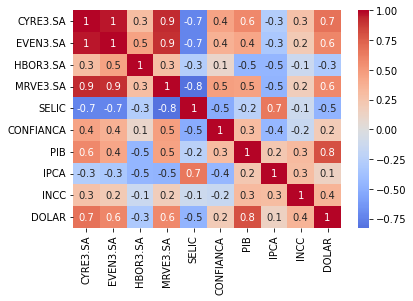

In [56]:
# Construtoras
lista_construcao = ['CYRE3.SA','MRVE3.SA','HBOR3.SA', 'EVEN3.SA']
construcao = yf.download(lista_construcao, start='2015-01-01', end='2023-02-28')['Adj Close']
heatmap(construcao)

###Commodities
'PETR4.SA', 'PRIO3.SA','VALE3.SA','SUZB3.SA'

[*********************100%***********************]  4 of 4 completed


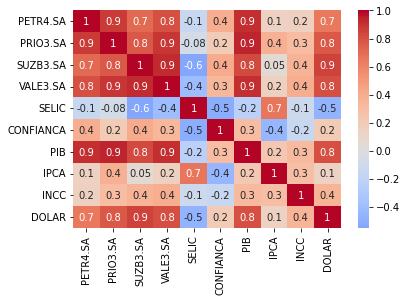

In [55]:
# Commodities
lista_commodities = ['PETR4.SA', 'PRIO3.SA','VALE3.SA','SUZB3.SA']
commodities = yf.download(lista_commodities, start='2015-01-01', end='2023-02-28')['Adj Close']
heatmap(commodities)

##Bancos

'BBAS3.SA','BBDC4.SA', 'ITUB4.SA', 'SANB11.SA'

[*********************100%***********************]  4 of 4 completed


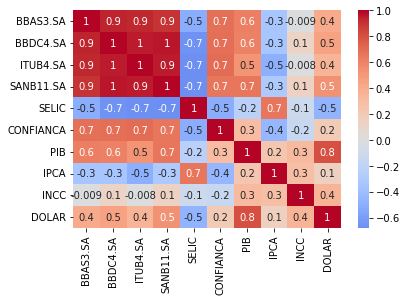

In [54]:
# Bancos
lista_bancos = ['BBAS3.SA','BBDC4.SA', 'ITUB4.SA', 'SANB11.SA']
bancos = yf.download(lista_bancos, start='2015-01-01', end='2023-02-28')['Adj Close']
heatmap(bancos)